# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
print(tf.config.list_physical_devices('CPU'))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 8718s 4s/step - loss: 1.5130 - accuracy: 0.5569 - val_loss: 0.5269 - val_accuracy: 0.8352
Epoch 2/10
2197/2197 [==============================] - 6840s 3s/step - loss: 0.4834 - accuracy: 0.8462 - val_loss: 0.2874 - val_accuracy: 0.9063
Epoch 3/10
2197/2197 [==============================] - 12407s 6s/step - loss: 0.2898 - accuracy: 0.9052 - val_loss: 0.2124 - val_accuracy: 0.9311
Epoch 4/10
2197/2197 [==============================] - 10368s 5s/step - loss: 0.1978 - accuracy: 0.9350 - val_loss: 0.1956 - val_accuracy: 0.9368
Epoch 5/10
2197/2197 [==============================] - 7545s 3s/step - loss: 0.1434 - accuracy: 0.9522 - val_loss: 0.1610 - val_accuracy: 0.9489
Epoch 6/10
2197/2197 [==============================] - 7886s 4s/step - loss: 0.1158 - accuracy: 0.9618 - val_loss: 0.1293 - val_accuracy: 0.9582
Epoch 7/10
2197/2197 [==============================] - 9854s 4s/step - loss: 0.0908 - accuracy: 0.9696 - val_loss: 0.1554

In [ ]:
# ViT Configuration
image_size = 128  # Input image size
patch_size = 16  # Each patch size (128/16 = 8x8 patches)
num_patches = (image_size // patch_size) ** 2  # Total patches
projection_dim = 64  # Dimension of patch embedding
num_heads = 8  # Number of attention heads
num_classes = len(class_names)  # Number of output classes
transformer_units = [projection_dim * 2, projection_dim]  # MLP hidden layer sizes
transformer_layers = 8  # Number of transformer layers

# Patch Embedding Layer
class PatchEmbedding(layers.Layer):
    def __init__(self, patch_size, num_patches, projection_dim):
        super().__init__()
        self.projection = layers.Dense(projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, x):
        positions = tf.range(start=0, limit=num_patches, delta=1)
        x = self.projection(x) + self.position_embedding(positions)
        return x

# Transformer Encoder Block
def transformer_encoder(x, num_heads, projection_dim):
    x_norm = layers.LayerNormalization()(x)
    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)(x_norm, x_norm)
    x = layers.Add()([x, attention_output])

    x_norm2 = layers.LayerNormalization()(x)
    x_mlp = keras.Sequential([
        layers.Dense(projection_dim * 2, activation="relu"),
        layers.Dense(projection_dim)
    ])(x_norm2)

    return layers.Add()([x, x_mlp])

# Build Vision Transformer Model
def build_vit():
    inputs = layers.Input(shape=(image_size, image_size, 3))
    x = layers.Conv2D(filters=projection_dim, kernel_size=patch_size, strides=patch_size, padding="valid")(inputs)
    x = layers.Reshape((num_patches, projection_dim))(x)

    x = PatchEmbedding(patch_size, num_patches, projection_dim)(x)

    for _ in range(transformer_layers):
        x = transformer_encoder(x, num_heads, projection_dim)

    x = layers.LayerNormalization()(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

# Initialize Model
vit_model = build_vit()

# Compile Model
vit_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Summary of the Model
vit_model.summary()


## Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 2304s 1s/step - loss: 0.0296 - accuracy: 0.9901
Training accuracy: 0.9900988936424255


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 274s 498ms/step - loss: 0.1361 - accuracy: 0.9610
Validation accuracy: 0.9610175490379333


### Saving Model

In [20]:
cnn.save('trained_plant_disease_model.keras')

In [21]:
training_history.history #Return Dictionary of history

{'loss': [1.5130205154418945,
  0.4834440350532532,
  0.2897823750972748,
  0.19775260984897614,
  0.1433698683977127,
  0.11581704765558243,
  0.09078501909971237,
  0.07685145735740662,
  0.0664069727063179,
  0.060540031641721725],
 'accuracy': [0.5569244027137756,
  0.8462337255477905,
  0.9051568508148193,
  0.9349740147590637,
  0.9522014260292053,
  0.961789608001709,
  0.9695568680763245,
  0.9745643138885498,
  0.9785333275794983,
  0.9809944033622742],
 'val_loss': [0.5269209146499634,
  0.28741469979286194,
  0.21243952214717865,
  0.19563505053520203,
  0.16104228794574738,
  0.12928585708141327,
  0.15541018545627594,
  0.1422235369682312,
  0.15154072642326355,
  0.13608254492282867],
 'val_accuracy': [0.8351923227310181,
  0.9062713384628296,
  0.9311404228210449,
  0.9367744326591492,
  0.9488959908485413,
  0.9582290053367615,
  0.954359233379364,
  0.9573184847831726,
  0.9561233520507812,
  0.9610175490379333]}

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

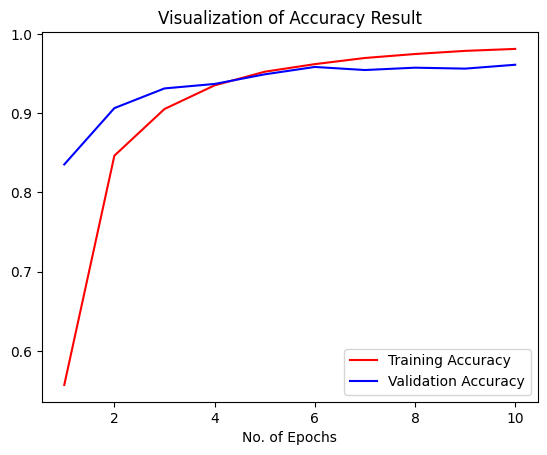

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [25]:
class_name = validation_set.class_names

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 548s 31ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [30]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.94      0.94       504
                                 Apple___Black_rot       0.98      0.97      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.97       440
                                   Apple___healthy       0.89      0.97      0.93       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.90      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.97      0.

### Confusion Matrix Visualization

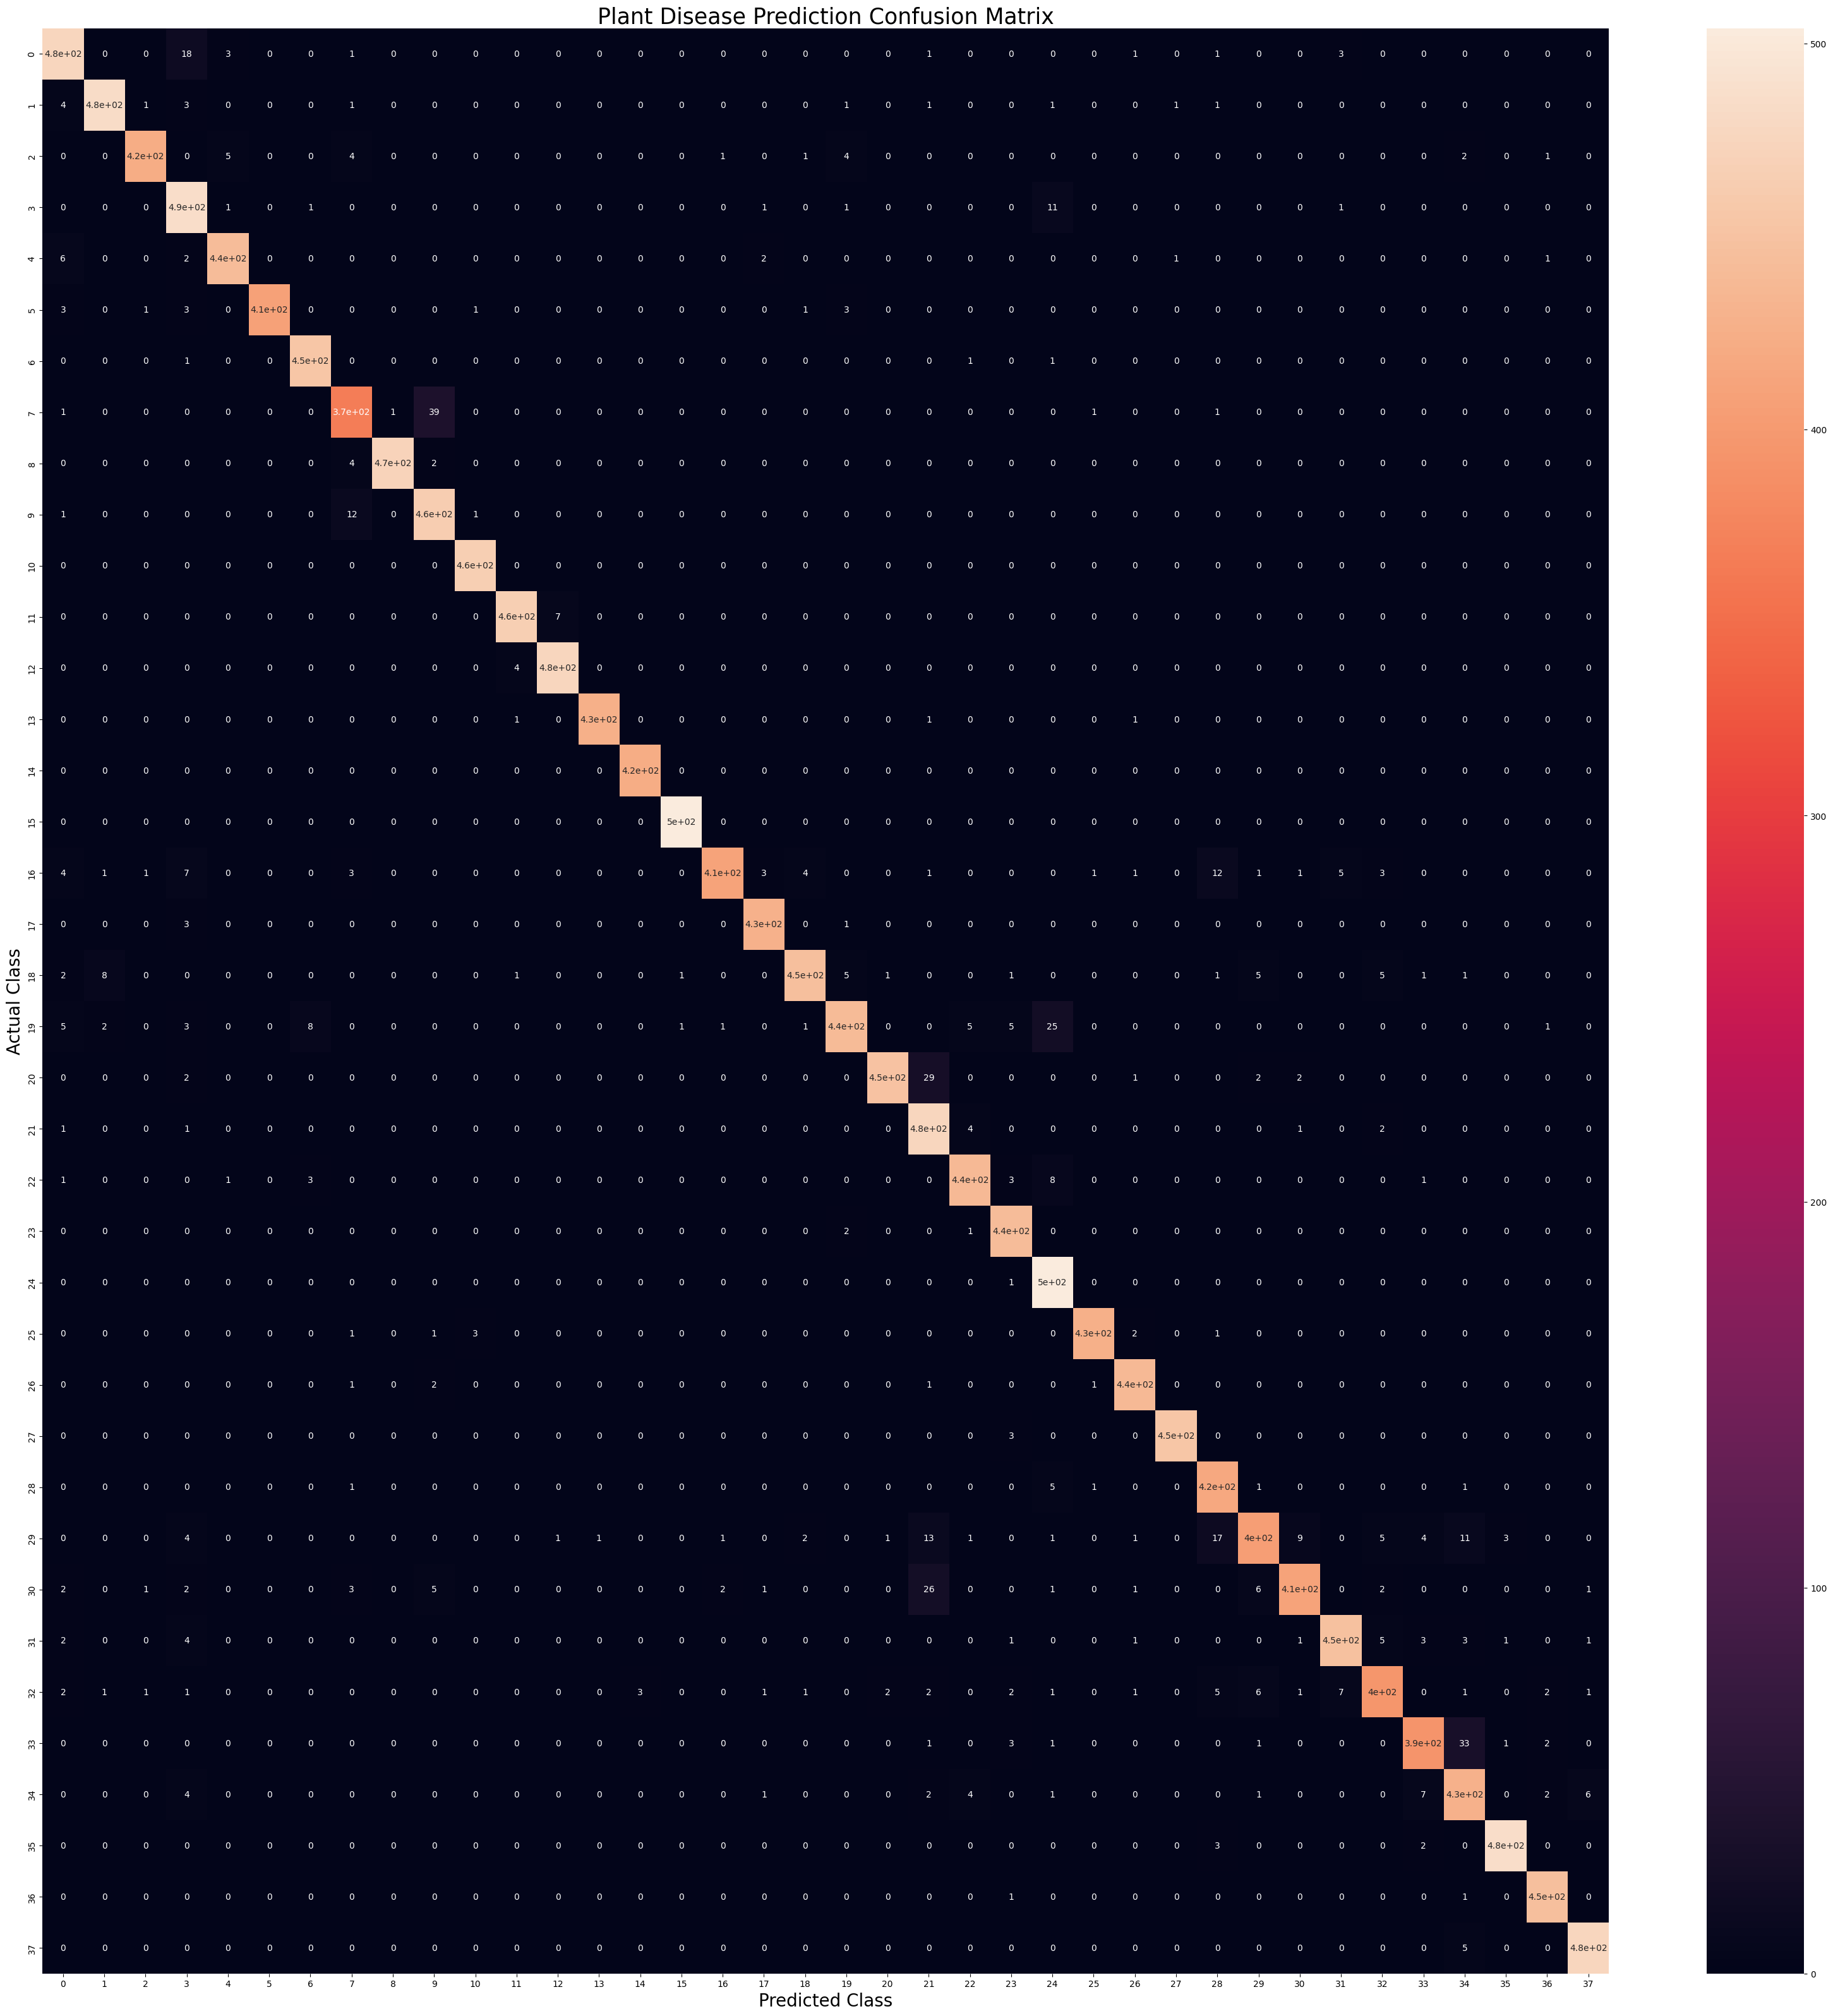

In [33]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()